In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [3]:
import numpy as np

In [4]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
from keras import models
from keras import layers

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

### 编译模型

In [19]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

### 配置优化器

In [20]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001), 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

### 使用自定义的损失loss和指标metrics

In [21]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

## 验证你的算法

### 留出验证集

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 训练模型

In [23]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.5325 - acc: 0.7916 - val_loss: 0.4061 - val_acc: 0.8699
Epoch 2/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.3254 - acc: 0.8996 - val_loss: 0.3152 - val_acc: 0.8852
Epoch 3/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.2357 - acc: 0.9241 - val_loss: 0.2827 - val_acc: 0.8897
Epoch 4/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.1867 - acc: 0.9395 - val_loss: 0.2870 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1502 - acc: 0.9519 - val_loss: 0.2765 - val_acc: 0.8888
Epoch 6/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1254 - acc: 0.9616 - val_loss: 0.3120 - val_acc: 0.8800
Epoch 7/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1043 - acc: 0.9688 - val_loss: 0.3129 - 

model.fit()返回了一个History对象.
这个对象有一个成员history,它是一个字典,包含训练过程中的所有数据.

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### 绘制训练损失和验证损失

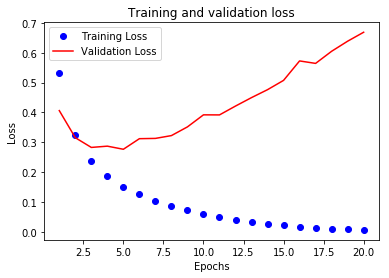

In [26]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = "Training Loss")
plt.plot(epochs, val_loss_values, 'r', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 绘制训练精度和验证精度

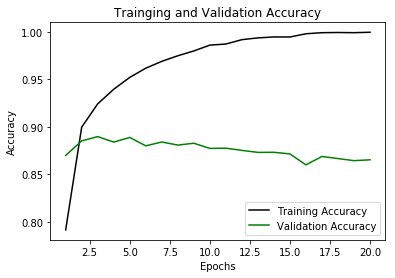

In [27]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'k', label = "Training Accuracy")
plt.plot(epochs, val_acc_values, 'g', label = "Validation Accuracy")
plt.title("Trainging and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

从图中可以看出,训练损失每轮都在降低,训练精度每轮都在提升.
这就是梯度下降优化的预期结果:你想要最小化的量随着每次迭代越来越小.

但是验证损失和验证精度却并非如此,出现了**过拟合**.

在第3轮训练后就可以停止训练了

### 从头开始重新训练一个模型

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
# 添加dropout
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.5911 - acc: 0.6795
Epoch 2/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.4468 - acc: 0.8042
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.3618 - acc: 0.8595
Epoch 4/4
25000/25000 [==============================] - 2s 81us/step


In [29]:
results

[0.27803622903347014, 0.88848]

In [30]:
model.predict(x_test)

array([[0.23893203],
       [0.99904114],
       [0.95350724],
       ...,
       [0.15933451],
       [0.15458314],
       [0.4091341 ]], dtype=float32)